In [20]:
import numpy as np
np.random.seed(0)

In [55]:
import re
import requests


def parse_text_file(text):
    data = text.split('\n')
    
    # reading P, N, M using re
    P, N, M = map(int, re.findall(r'\d+', data[1]))
    
    X = np.zeros((P,N))
    y = np.zeros((P,M))
    for i, line in enumerate(data[2: 2 + P]):
        nums = list(map(float, line.split()))
        X[i] = nums[:N]
        y[i] = nums[N:]
    return P, N, M, X, y

text_file = requests.get(
  'https://raw.githubusercontent.com/SvetlanaSeliunina/TNN/main/PA-F-training.txt'
).text
print(text_file)

P, N, M, X, y = parse_text_file(
    text_file
    )
print(f'P = {P}, N = {N}, M = {M}')
print('X =', X)
print('y =', y)
y = np.where(y<0, 0, y)


# WS22_TNN_Assignment_PA-F_data_File_PA-F-training.txt 
# P=15  N=2  M=1 
0.00   3.00     +1.00 
1.00   3.00     +1.00 
1.00   2.00     +1.00 
2.00   2.00     +1.00 
2.00   4.00     +1.00 
5.00   8.00     +1.00 
0.00   -3.00    -1.00 
1.00   -3.00    -1.00 
1.00   -2.00    -1.00 
2.00   -4.00    -1.00 
3.00   1.00     -1.00 
3.00   0.00     -1.00 
3.00   -2.00    -1.00 
4.00   -1.00    -1.00 
5.00   1.00     -1.00 

P = 15, N = 2, M = 1
X = [[ 0.  3.]
 [ 1.  3.]
 [ 1.  2.]
 [ 2.  2.]
 [ 2.  4.]
 [ 5.  8.]
 [ 0. -3.]
 [ 1. -3.]
 [ 1. -2.]
 [ 2. -4.]
 [ 3.  1.]
 [ 3.  0.]
 [ 3. -2.]
 [ 4. -1.]
 [ 5.  1.]]
y = [[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


In [56]:
#taken from single-layer perceptron
class DenseLayer:
    def __init__(self, n_units, 
        input_size):
        
        self.n_units = n_units
        self.input_size = input_size
        
        # weights
        self.W = None
                
        # tanh activation function and its derivative
        self.fn = lambda x: 1 / (1 + np.exp(-x))
        self.df = lambda x: x * (1 - x)

    def init_weights(self, weights):
        if weights is not None:
            self.W = weights
        else:
            self.W = np.random.uniform(-2, 2, (self.n_units, self.input_size + 1))
            
   
    def __call__(self, X):
        
        # adding a vector of 1s for the bias-weight
        X_extended = np.hstack([
            np.ones((X.shape[0], 1)),
            X
        ])
        # multiplying the inputs by the weights
        Z = X_extended @ self.W.T
        
        # applying transfer function
        return self.fn(Z)

In [57]:
class SingleLayerPerceptron:
    def __init__(self, n_neurons, input_size, lr=0.1, weights = None):
        
        # initializing the layer
        self.layer = DenseLayer(n_units = n_neurons, input_size = input_size)
        self.layer.init_weights(weights)
        
        # learning rate
        self.lr = lr

    def forward(self, X):
        # forward propagation
        return self.layer(X)
    
    def extend(self, vec):
        return np.hstack([np.ones((vec.shape[0], 1)), vec])

    def backward(self, X, y_pred, y_true):
        delta = y_pred - y_true        
        derivative_to_output = np.array(list(map(self.layer.df,y_pred)))
        
        # weight change from delta rule
        dW = self.lr * ((y_true - y_pred) * derivative_to_output).T @ self.extend(X)
        self.layer.W += dW
        return self.layer.W

    def mean_square_error(self, y_pred, y):
        return np.sqrt(((y_pred - y)**2).mean(axis=None))

w: [[-0.23608866 -2.73465147  4.69748721]]


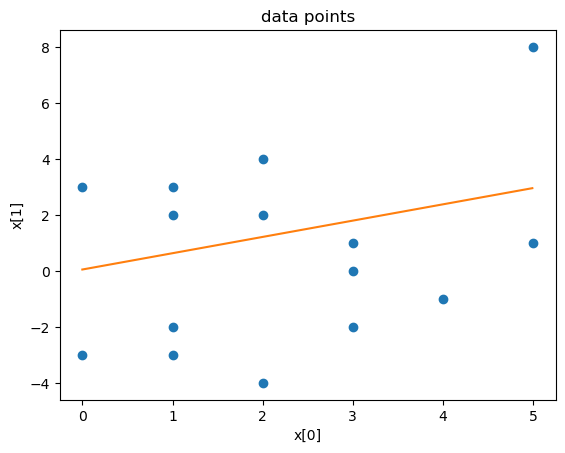

In [58]:
import matplotlib.pyplot as plt

model = SingleLayerPerceptron(n_neurons = M, input_size=N)

cycles_mse = []
for i in range(10000):
    y_pred = model.forward(X)
    w = model.backward(X, y_pred, y)
    cycles_mse.append([
        i,
        model.mean_square_error(y_pred, y)
    ])
print('w:', w)

plt.plot(X[:,0],X[:,1], 'o')
p = np.arange(0, 5, 0.01)
plt.plot(p, -w[0,1]/w[0,2]*p -w[0,0]/w[0,2])
plt.title('data points')
plt.xlabel('x[0]')
plt.ylabel('x[1]')
plt.show()

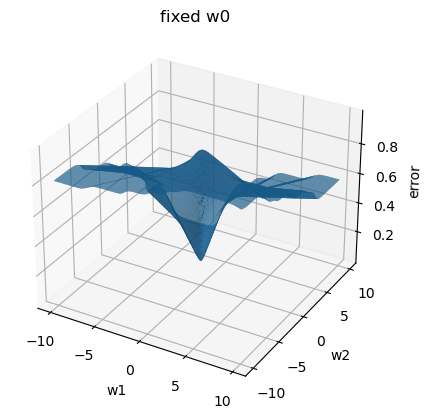

In [59]:
text_file = requests.get(
  'https://raw.githubusercontent.com/SvetlanaSeliunina/TNN/main/PA-F-training.txt'
).text

P, N, M, X, y = parse_text_file(
    text_file
    )
y = np.where(y<0, 0, y)

#fix w0
cycles_mse = []
for i in np.arange(-10,10,0.1):
    for j in np.arange(-10,10,0.1):
        model = SingleLayerPerceptron(n_neurons = M, input_size=N, weights = np.array([[w[0,0], i, j]]))
        y_pred = model.forward(X)
        cycles_mse.append([
            i, j,
            model.mean_square_error(y_pred, y)
        ])
        
x, y, z = zip(*cycles_mse)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(x,y,z)
ax.set_title('fixed w0')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('error')
plt.show()

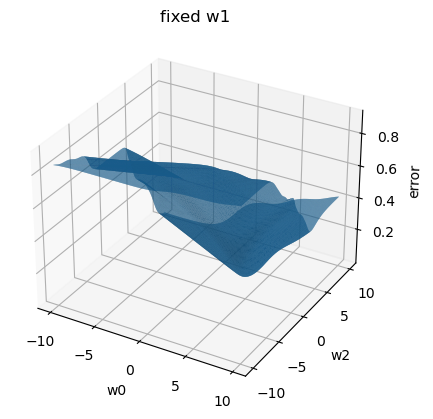

In [60]:
text_file = requests.get(
  'https://raw.githubusercontent.com/SvetlanaSeliunina/TNN/main/PA-F-training.txt'
).text

P, N, M, X, y = parse_text_file(
    text_file
    )
y = np.where(y<0, 0, y)

#fix w1
cycles_mse = []
for i in np.arange(-10,10,0.1):
    for j in np.arange(-10,10,0.1):
        model = SingleLayerPerceptron(n_neurons = M, input_size=N, weights = np.array([[i, w[0,1], j]]))
        y_pred = model.forward(X)
        cycles_mse.append([
            i, j,
            model.mean_square_error(y_pred, y)
        ])
        
x, y, z = zip(*cycles_mse)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(x,y,z)
ax.set_title('fixed w1')
ax.set_xlabel('w0')
ax.set_ylabel('w2')
ax.set_zlabel('error')
plt.show()

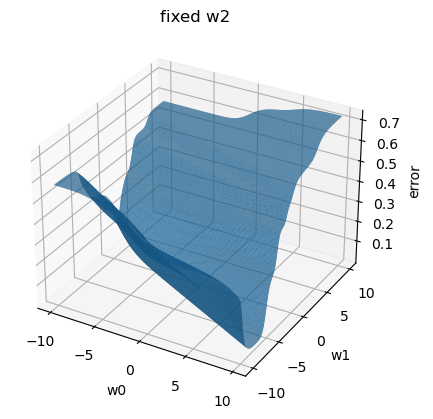

In [61]:
text_file = requests.get(
  'https://raw.githubusercontent.com/SvetlanaSeliunina/TNN/main/PA-F-training.txt'
).text

P, N, M, X, y = parse_text_file(
    text_file
    )
y = np.where(y<0, 0, y)

#fix w2
cycles_mse = []
for i in np.arange(-10,10,0.1):
    for j in np.arange(-10,10,0.1):
        model = SingleLayerPerceptron(n_neurons = M, input_size=N, weights = np.array([[i, j, w[0,2]]]))
        y_pred = model.forward(X)
        cycles_mse.append([
            i, j,
            model.mean_square_error(y_pred, y)
        ])
        
x, y, z = zip(*cycles_mse)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(x,y,z)
ax.set_title('fixed w2')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('error')
plt.show()